# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)
    * **TotalWorkingYears**	:	총 근무 연수



## **2.범주-->범주**

In [16]:
target = 'Attrition'

### **(1) Gender --> Attrition**

In [4]:
feature = 'Gender'

* 교차표

In [5]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

Gender,Female,Male
Attrition,,
0,157,248
1,66,129


In [6]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

Gender,Female,Male
Attrition,,
0,0.704036,0.657825
1,0.295964,0.342175


* 시각화

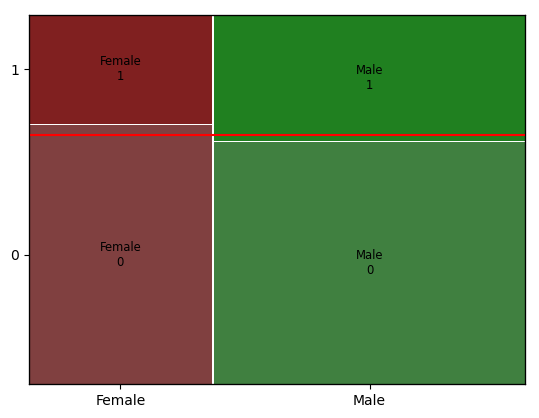

In [7]:
mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [8]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 Gender     Female  Male
Attrition              
0             157   248
1              66   129
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.1614318259891623
p-value 0.28116879016055174
자유도 1
기대빈도
 [[150.525 254.475]
 [ 72.475 122.525]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

### **(2) JobSatisfaction --> Attrition**

In [24]:
feature = 'JobSatisfaction'

* 교차표

In [25]:
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


In [26]:
pd.crosstab(data[target], data[feature], normalize='columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


* 시각화

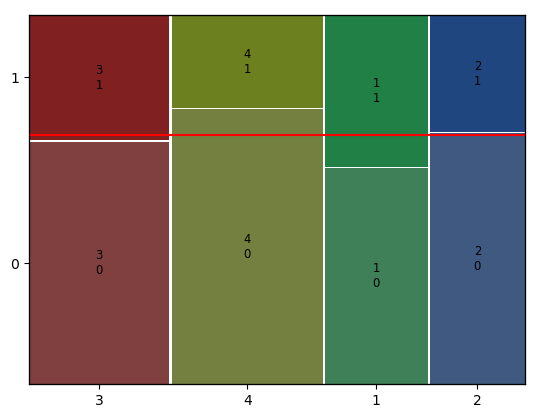

In [27]:
mosaic(data, [feature, target])
plt.axhline(1 - data[target].mean(), color='r')
plt.show()

* 수치화 : 카이제곱검정

In [29]:
table = pd.crosstab(data[target], data[feature])
spst.chi2_contingency(table)

(8.884191097554549,
 0.03087092125625072,
 3,
 array([[ 85.05 ,  78.3  , 116.775, 124.875],
        [ 40.95 ,  37.7  ,  56.225,  60.125]]))

* 파악된 내용을 기술해 봅시다.

- 카이제곱 통계량을 보면 소폭 관계가 있음을 알 수 있으며, 그래프 또한 마찬가지이다.
- p-value 또한 0.03으로 매우 작지는 않으면 조금 관계가 있다고 말할 수 있을 것 같다.
- 특히 양측 끝인 1과 4에 속하는 인원들이 이직률에 주로 관계가 있다고 보인다.

### **(3) MaritalStatus --> Attrition**

In [34]:
feature  = 'MaritalStatus'

* 교차표

In [35]:
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


In [36]:
pd.crosstab(data[target], data[feature], normalize='columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.794643,0.748175,0.518692
1,0.205357,0.251825,0.481308


* 시각화

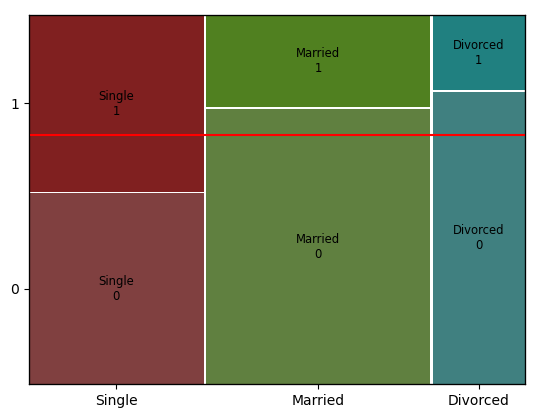

In [38]:
mosaic(data, [feature, target])
plt.axhline(1- data[target].mean(), color='r')
plt.show()

* 수치화 : 카이제곱검정

In [39]:
table = pd.crosstab(data[target], data[feature])
spst.chi2_contingency(table)

(37.829711907070525,
 6.100738829354226e-09,
 2,
 array([[ 75.6 , 184.95, 144.45],
        [ 36.4 ,  89.05,  69.55]]))

* 파악된 내용을 기술해 봅시다.

- 싱글의 경우 이직률이 굉장히 높다.
- 카이제곱 통계량을 보았을 때, 결혼 여부와 이직률은 큰 관계가 있다고 이해할 수 있다.
- p-value 또한 매우 작으며 귀무가설을 기각할 수 있다.

### **(4) OverTime --> Attrition**

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [40]:
feature = 'Age'

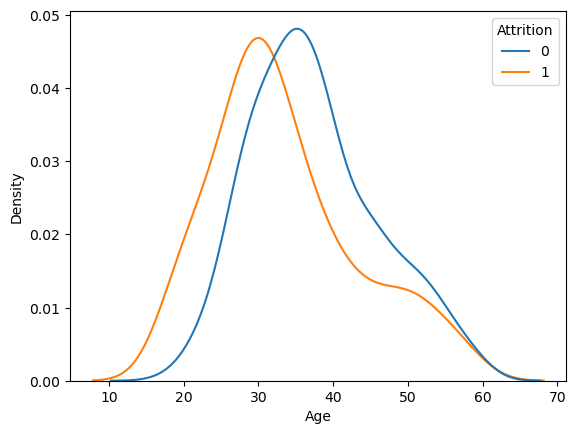

In [41]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

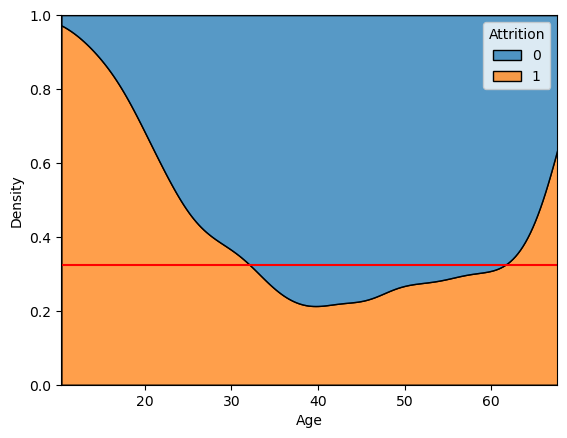

In [42]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 약 30대 중반 미만 직원들은 이직할 확률이 전체 평균보다 높은 경향이 있다.
- 30대 중반에서 60대 초반 직원들은 이직할 확률이 전체 평균보다 낮은 경향이 있다.

### **(2) DistanceFromHome --> Attrition**

In [43]:
feature = 'DistanceFromHome'

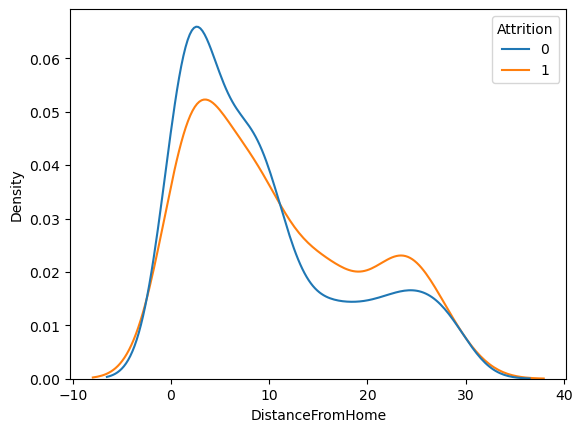

In [45]:
sns.kdeplot(x=feature, hue=target, data=data, common_norm=False)
plt.show()

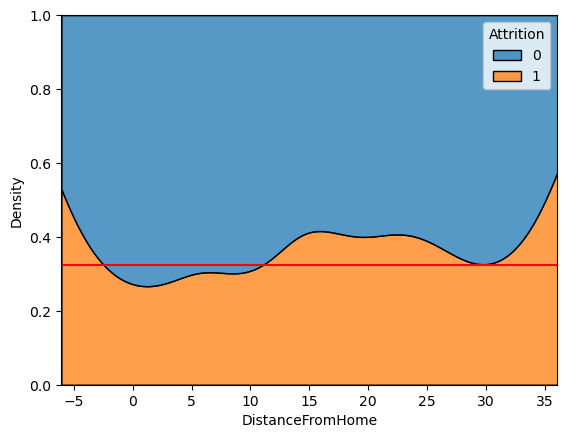

In [48]:
sns.kdeplot(x=feature, hue=target, data=data, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 집에서 회사까지의 거리가 약 10km 초반인 경우 이직률이 전체 평균보다 낮다
- 집에서 회사까지의 거리가 약 10km 초반 ~ 30km 정도인 경우 이직률이 전체 평균보다 높다.

### **(3) MonthlyIncome --> Attrition**

In [49]:
feature = 'MonthlyIncome'

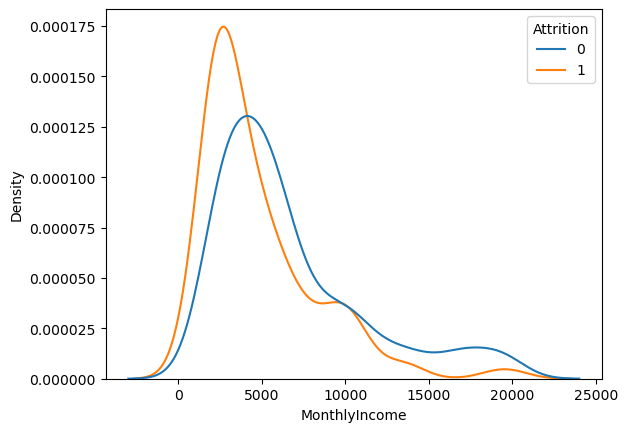

In [50]:
sns.kdeplot(x=feature, hue=target, data=data, common_norm=False)
plt.show()

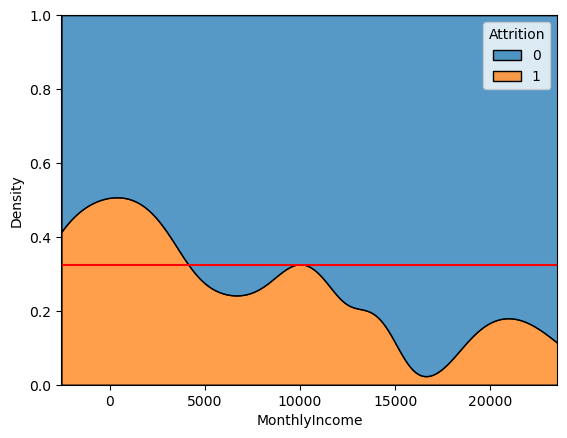

In [52]:
sns.kdeplot(x=feature, hue=target, data=data, multiple='fill')
plt.axhline(data[target].mean(), color='r')
plt.show()

* 파악된 내용을 기술해 봅시다.

- 월급이 약 4000달러 후반인 경우 전체 평균보다 이직률이 높다.
- 월급이 약 4000달러보다 많은 경우 전체 평균보다 이직률이 낮다.

### **(4) PercentSalaryHike --> Attrition**

* 파악된 내용을 기술해 봅시다.

### **(5) TotalWorkingYears --> Attrition**

* 파악된 내용을 기술해 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음(약한 관계)